In [1]:
using Plots, Printf, DelimitedFiles, BenchmarkTools
using Revise
using MDToolbox
ENV["COLUMNS"] = 130

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/MgvIv/src/Revise.jl:1167
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1260


130

In [2]:
q_array = readdlm("data/quaternion/QUATERNION_LIST_576_Orient")

576×4 Array{Float64,2}:
  0.809511   0.106574    0.351469    0.458043
  0.754344   0.31246     0.220942    0.533402
  0.64777    0.497052    0.0753591   0.572411
  0.497052   0.64777    -0.0753591   0.572411
  0.31246    0.754344   -0.220942    0.533402
  0.106574   0.809511   -0.351469    0.458043
 -0.106574   0.809511   -0.458043    0.351469
 -0.31246    0.754344   -0.533402    0.220942
 -0.497052   0.64777    -0.572411    0.0753591
 -0.64777    0.497052   -0.572411   -0.0753591
 -0.754344   0.31246    -0.533402   -0.220942
 -0.809511   0.106574   -0.458043   -0.351469
  0.905061   0.119154    0.105662    0.394338
  ⋮                                 
  0.572411   0.0753591   0.64777    -0.497052
  0.533402   0.220942    0.754344   -0.31246
  0.458043   0.351469    0.809511   -0.106574
  0.351469   0.458043    0.809511    0.106574
  0.220942   0.533402    0.754344    0.31246
  0.0753591  0.572411    0.64777     0.497052
 -0.0753591  0.572411    0.497052    0.64777
 -0.220942   0.53340

In [3]:
model_array = readpdb("data/t1r/cluster.pdb");
for iatom = 1:model_array.natom
    model_array.atomname[iatom] = model_array.resname[iatom]
end
model_array

50x1044 TrjArray
| X                          | X                          |  …   X                          | X                          |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
|   123.43    96.60   -11.87 |   125.11    94.21    -9.02 |  …     211.38   135.89   -11.68 |   211.63   139.65   -11.63 |
|   124.28    93.08   -12.36 |   123.45    91.84    -9.13 |        204.75   148.42    18.59 |   207.50   151.03    18.92 |
|   121.60    94.52     1.53 |   124.37    91.92     2.82 |        205.75   163.71    34.08 |   207.55   166.61    36.17 |
|   126.61    98.55   -14.33 |   125.41    95.98   -11.93 |        179.36   149.81   -35.57 |   181.71   146.56   -36.55 |
|   119.33    91.54    -1.47 |   120.70    94.45    -3.33 |        193.98   172.43    23.32 |   190.61   170.30    22.76 |

In [4]:
MDToolbox.decenter!(model_array)

50x1044 TrjArray
| X                          | X                          |  …   X                          | X                          |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
| 1THR                       | 2SER                       |  …   1043PRO                    | 1044SER                    |
|   -25.55   -25.83   -11.87 |   -23.88   -28.22    -9.02 |  …      62.39    13.46   -11.68 |    62.64    17.22   -11.63 |
|   -24.71   -29.35   -12.36 |   -25.53   -30.59    -9.13 |         55.76    25.99    18.60 |    58.51    28.60    18.92 |
|   -27.38   -27.91     1.53 |   -24.62   -30.51     2.82 |         56.77    41.28    34.08 |    58.56    44.18    36.17 |
|   -22.37   -23.88   -14.33 |   -23.58   -26.45   -11.93 |         30.38    27.38   -35.57 |    32.72    24.13   -36.55 |
|   -29.66   -30.89    -1.47 |   -28.29   -27.98    -3.32 |         45.00    50.00    23.32 |    41.62    47.87    22.76 |

In [17]:
#model_rotated = MDToolbox.rotate(model_array[1, :], q_array[100, :])
#observed = afmize(model_rotated, AfmizeConfig(10.0 * (pi / 180), 30.0, MDToolbox.Point2D(-250, -200), MDToolbox.Point2D(250, 200), MDToolbox.Point2D(6.25, 6.25), MDToolbox.defaultParameters()))
#observed = translateafm(observed, (2, 3))
#heatmap(observed)

In [6]:
param_array = [];
for r in [30.0, 40.0]
  param_array = [param_array; AfmizeConfig(10.0 * (pi / 180), r, MDToolbox.Point2D(-250, -200), MDToolbox.Point2D(250, 200), MDToolbox.Point2D(6.25, 6.25), MDToolbox.defaultParameters())]
end

In [7]:
#asd = readasd("data/t1r/201711020044.asd")
asd = []
for i = 1:837
    filename = @sprintf "data/t1r/%03d.dat" i
    d = readdlm(filename)
    push!(asd, collect(d' .* 10.0))
end

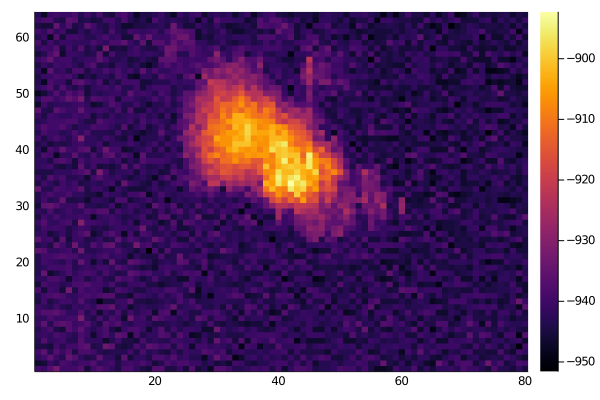

In [14]:
heatmap(asd[11])

In [15]:
r = getafmposterior(asd[11], model_array, q_array, param_array)

imodel = 1
imodel = 2
imodel = 3
imodel = 4
imodel = 5
imodel = 6
imodel = 7
imodel = 8
imodel = 9
imodel = 10
imodel = 11
imodel = 12
imodel = 13
imodel = 14
imodel = 15
imodel = 16
imodel = 17
imodel = 18
imodel = 19
imodel = 20
imodel = 21
imodel = 22
imodel = 23
imodel = 24
imodel = 25
imodel = 26
imodel = 27
imodel = 28
imodel = 29
imodel = 30
imodel = 31
imodel = 32
imodel = 33
imodel = 34
imodel = 35
imodel = 36
imodel = 37
imodel = 38
imodel = 39
imodel = 40
imodel = 41
imodel = 42
imodel = 43
imodel = 44
imodel = 45
imodel = 46
imodel = 47
imodel = 48
imodel = 49
imodel = 50


(50, 421, AfmizeConfig(0.17453292519943295, 30.0, MDToolbox.Point2D{Int64}(-250, -200), MDToolbox.Point2D{Int64}(250, 200), MDToolbox.Point2D{Float64}(6.25, 6.25), Dict("SI" => 2.1,"GLN" => 3.0,"GLU" => 2.95,"C" => 1.7,"MG" => 1.73,"P" => 1.8,"LYS" => 3.2,"GLY" => 2.25,"ASN" => 2.85,"NE" => 1.54…)), (9, -3), [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], -6902.932745219034)

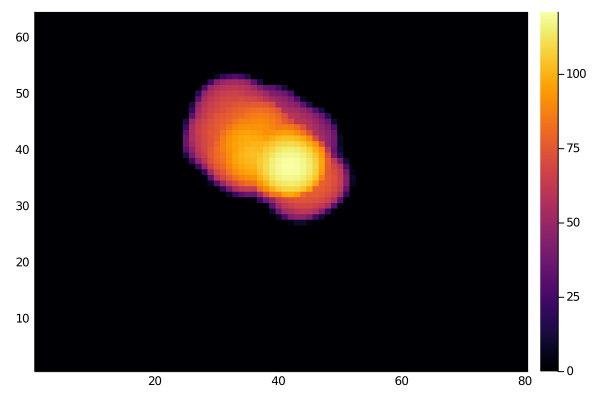

In [16]:
heatmap(r[5])